In [ ]:
#Regressão linear utilizando o otimizador 
#Library Definition 

import numpy as np # library to vectores and matrix
import scipy # library to use train and test functions
import matplotlib.pyplot as plt #build graphs
from scipy.optimize import curve_fit #library to optimization the MSE(ERRO DO QUADRADO MEDIO)

In [ ]:
#defining the variables
idade = [12,25,57,45,26,64,37,40,24,33] #independent variable
salarioAnual = [15000,29000,68000,52000,32000,80000,41000,45000,26000,33000] #dependent variable

xData = np.array(idade) # transforming into array
yData = np.array(salarioAnual) # transforming into array



In [ ]:
#Defining the function to optimization
def equacaolinear (x,a,b):
  return a * x + b


In [ ]:
#generate the standards to optimization
parametrosiniciais = np.array([1.0,1.0])
  

In [ ]:
#realiza a otimização através do erro medio quadrado (MSE)
parametrosOtimizados, pcov = curve_fit(equacaolinear,xData,yData,parametrosiniciais)
#parametrosOtimizados = contém os parâmetros de ajuste da curva
#pcov - contém a covariancia dos parâmetros encontrados

In [ ]:
#realiza a previsão dos dados através do modelo (constroi a equação linear)
pervisaoModelo = equacaolinear(xData, *parametrosOtimizados) #Utilizar a função linear com os parâmetros otimizados

In [ ]:
#encontrar o erro absoluto
erroAbsoluto = pervisaoModelo - yData #(valor previsto - valor real)

In [ ]:
#calculo o erro quadrado entre cada medida
SE = np.square(erroAbsoluto)
#calcula o MSE 
MSE = np.mean(SE)
print("SE", SE)
print("MSE", MSE)

SE [ 9408026.64961921   861912.37527424    40792.65486083   811117.13597038
  7219655.81599996 12332861.75831048  3877021.27565351  2867492.5511905
   689160.64544096 25032137.82699835]
MSE 6314017.868931843


In [ ]:
#realizar o calculo do coeficiente de determinação
Rsquared = 1.0- (np.var(erroAbsoluto)/ np.var(yData))# np.var encontra a variância entre os dados do vetor
print("Coeficiente de Determinação: ", Rsquared)

Coeficiente de Determinação:  0.9822883731130415


In [ ]:
#mostrar os parametros da regressão
print("Y {}x {} ".format(parametrosOtimizados[0], parametrosOtimizados[1]))

Y 1241.4506388940272 x -2964.658332979654 


Text(0, 0.5, 'Salário Anual')

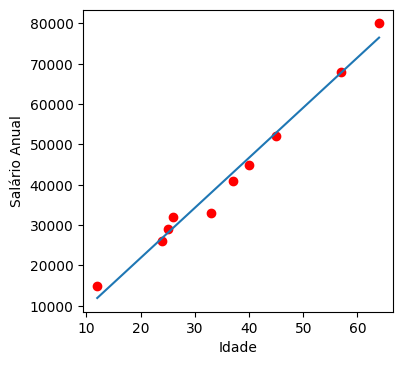

In [ ]:
#realizar o plot da figura
f = plt.figure(figsize=(4,4),dpi =100) #indica o tamanho da figura
axes = f.add_subplot(111) #cria o objeto para o subplot

#frealiza o plot dos dados (pontos no gráfico)
axes.plot(xData,yData,"ro")

#cria os dados para serem utilziados na construção da linha (equação)
xModel = np.linspace(min(xData), max(xData))#encontra os valores máximos e mínimos da linha
yModel = equacaolinear(xModel, *parametrosOtimizados) #aplica a função com os parâmetros obtidos

#realizar o plot da linha
axes.plot(xModel, yModel)
plt.xlabel("Idade")
plt.ylabel("Salário Anual")




Agora vamos mostrar como o mesmo código pode ser feito pelo Sci kit Learn


In [ ]:
#utilziar funções do sklearn para construir a regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
reg = LinearRegression() #objeto para a regressão linear
x_ModeloSklearn = xData.reshape((-1,1)) #na regressão linear é necessário q o X seja D2
regressao = reg.fit(x_ModeloSklearn, yData) # realiza a regressão

In [ ]:
previsao = reg.predict(x_ModeloSklearn)

In [ ]:
MSE = mean_squared_error(yData,previsao)
print (MSE)

6314017.868931828


In [ ]:
#parametros encontrados
print("Y = {}x {} ".format(reg.coef_, reg.intercept_))
from sklearn.metrics import r2_score #metodo para o cálculo do R2

R_2 = r2_score(yData, previsao) #realiza o cálculo do R2

print ("Coeficiente de determinação (R2):  ", R_2)

Y = [1241.45064038]x -2964.6582456758188 
Coeficiente de determinação (R2):   0.9822883731130415


Agora vamos realizar a construção para um banco de dados real


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving headbrain.csv to headbrain.csv


In [ ]:
#realiza a leitura do banco de dados
data = pd.read_csv("headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
#há necessidade de conversão para array, pois, o formato das colunas são seres
x = data["Head Size(cm^3)"].values
y = data["Brain Weight(grams)"].values


In [ ]:
#realiza a construção do modelo de regressão utilziando sklearn LinearRegression()
rel = LinearRegression()
x_Reshaped = x.reshape((-1,1)) #coloca os dados em formto 2D
regressao = reg.fit(x_Reshaped,y)



In [ ]:
#realizar a previsão
previsao=reg.predict(x_Reshaped)


In [ ]:
#Parametros Encontrados
print("Y = {}x {}".format(reg.coef_,reg.intercept_))
R2 = r2_score(y,previsao) #realiza o cálculo do R2

print("Coeficiente de determinação ", R2)

Y = [0.26342934]x 325.5734210494426
Coeficiente de determinação  0.639311719957


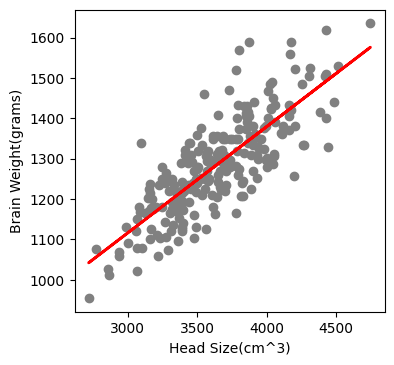

In [ ]:
#relizar o plot dos dados 

plt.figure(figsize=(4,4), dpi=100)
plt.scatter(x,y, color ="grey") #realiza o plot do gráfico da dispersão
plt.plot(x, previsao, color = "red", linewidth = 2)#realzia o plot da linha
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.show()